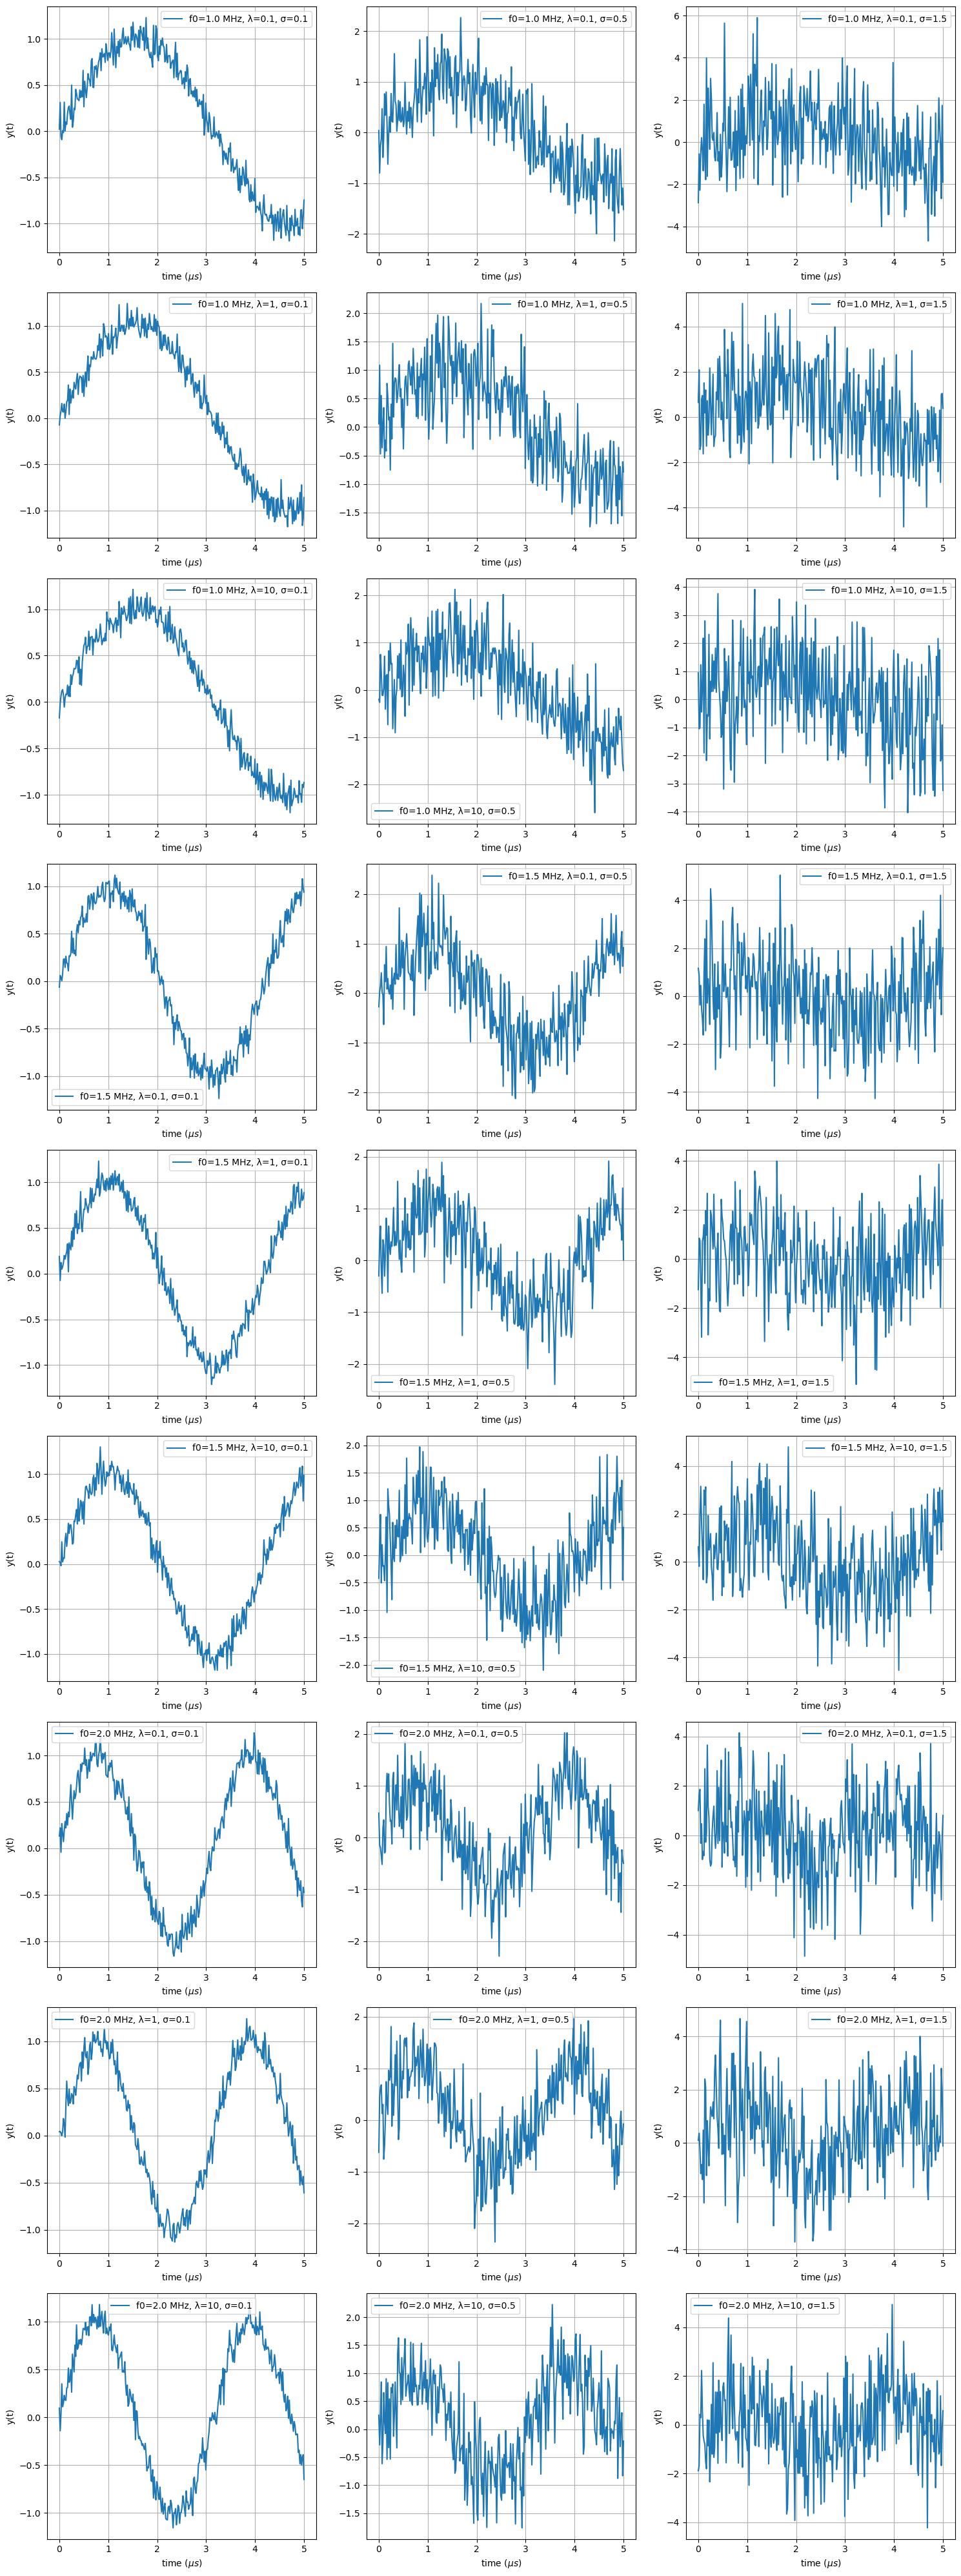

In [146]:
import numpy as np
import matplotlib.pyplot as plt
def noise(mean,s,t): return np.random.normal(loc=mean,scale=s,size=len(t))
def yv(t,l,f0,w): return np.exp(-l*t)*np.sin(f0*t)+w
T=5e-6
t=np.linspace(0,T,300)
mean=0
f0v=[1e6, 1.5e6, 2e6]
lv=[0.1, 1, 10]
sv=[0.1, 0.5, 1.5]
fig=plt.figure(figsize=(15, 40))
nfig=1
for f0 in f0v:
    for l in lv:
        for s in sv:
            plt.subplot(9,3,nfig)
            w=noise(mean,s,t)
            y=yv(t,l,f0,w)
            plt.plot(t*1e6,y,label=f"f0={f0/1e6} MHz, λ={l}, σ={s}")
            plt.xlabel("time $(µs)$")
            plt.ylabel("y(t)")
            plt.grid(1)
            plt.legend()
            nfig+=1
fig.tight_layout()
plt.show()

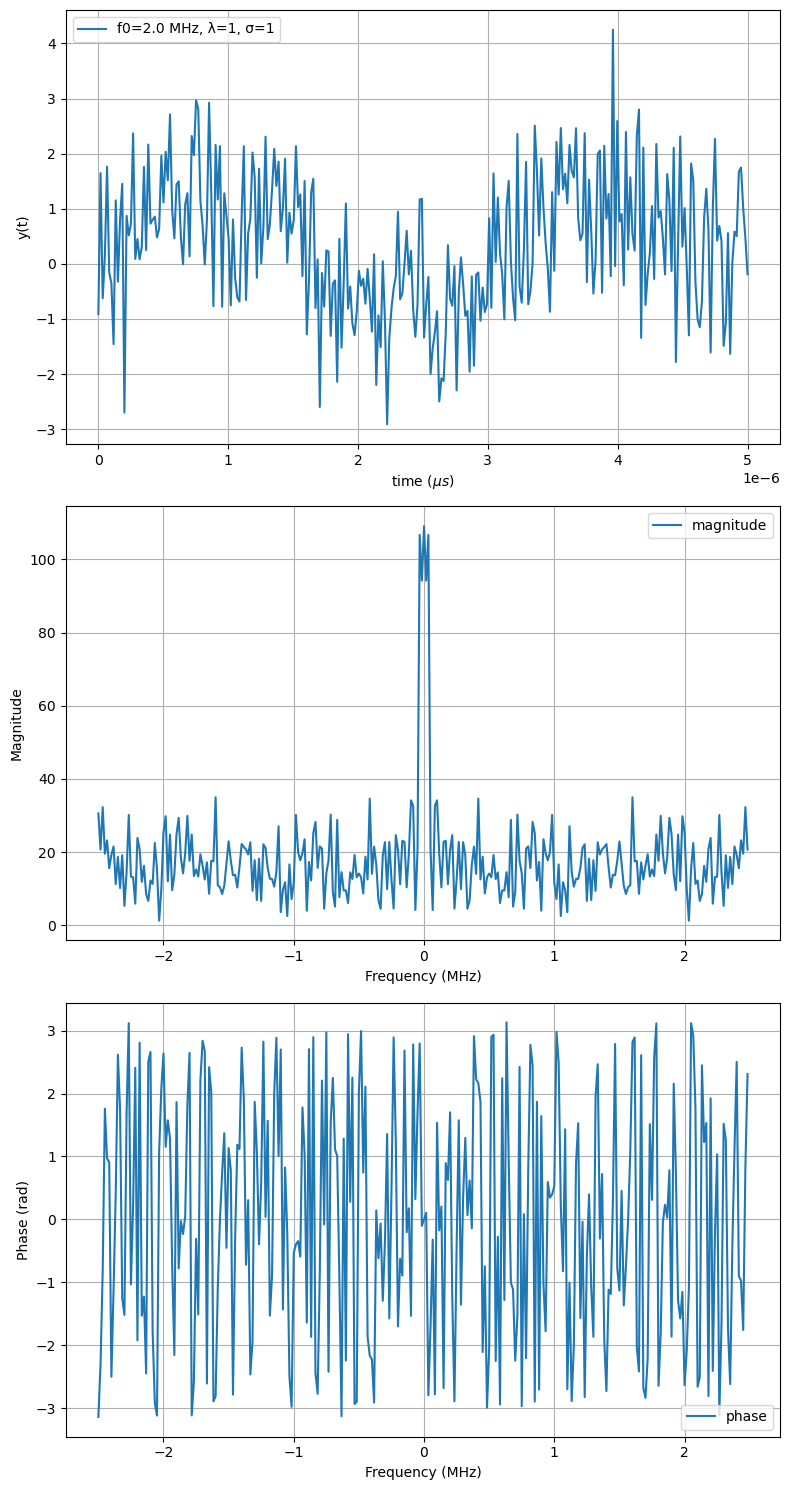

In [153]:
import numpy as np
import matplotlib.pyplot as plt
def noise(mean,s,t): return np.random.normal(loc=mean,scale=s,size=len(t))
def yv(t,l,f0,w): return np.exp(-l*t)*np.sin(f0*t)+w
T=5e-6
t=np.linspace(0,T,300)
mean=0
f0=2e6
l=1
s=1
w=noise(mean,s,t)
y=yv(t,l,f0,w)
yfft=np.fft.fftshift(np.fft.fft(y))
freqs=1e6*np.fft.fftshift(np.fft.fftfreq(len(t), d=1/T))
magnitude=np.abs(yfft)
phase=np.angle(yfft)

fig2=plt.figure(figsize=(8, 15))
plt.subplot(3,1,1)
plt.plot(t,y,label=f"f0={f0/1e6} MHz, λ={l}, σ={s}")
plt.xlabel("time $(µs)$")
plt.ylabel("y(t)")
plt.grid(1)
plt.legend()

plt.subplot(3,1,2)
plt.plot(freqs, magnitude,label="magnitude") 
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.grid(1)
plt.legend()

plt.subplot(3,1,3)
plt.plot(freqs,phase,label="phase")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase (rad)")
plt.grid(1)
plt.legend(loc='lower right')
fig2.tight_layout()
plt.show()
